# Data Analytics -  Lab 1 - Random data visualisation and sampling

1. Create a ```jupyter``` notebook.


In [1]:
import numpy as np
import matplotlib.pyplot as plt

2. Using ```numpy.random``` generate arrays of:
   - 1000 samples of uniform distribution on interval $[0,1]$
   - 1000 samples of normal distribution with mean $\mu=0$ and standard deviation $\sigma=1$.
   - 1000 samples of normal distribution with mean $\mu=0$ and standard deviation $\sigma=10$.
   - 1000 samples of beta distribution for the following pairs of parameters $(\alpha,\beta)\in\{(1,1), (2,2),(3,9)\}$
   - 10000 samples of two-dimensional normal distributions each with  mean $\mu=[0,0]^\mathsf{T}$ and covariance matrices
$$
\Sigma_1=\begin{bmatrix}1&0\\0&1\end{bmatrix}
$$

$$
\Sigma_2=\begin{bmatrix}2&1\\1&2\end{bmatrix}
$$


In [33]:
uniform_distribution_0_1 = np.random.uniform(0, 1, 1000)
normal_distribution_mu0_sig1 = np.random.normal(0, 1, 1000)
normal_distribution_mu0_sig10 = np.random.normal(0, 10, 1000)
beta_distribution_a1_b1 = np.random.beta(1, 1, 1000)
beta_distribution_a2_b2 = np.random.beta(2, 2, 1000)
beta_distribution_a3_b9 = np.random.beta(3, 9, 1000)

mu0 = np.array([0, 0])
cov1 = np.array([[1, 0], [0, 1]])
cov2 = np.array([[2, 1], [1, 2]])
normal2D_distribution_mu0_cov1 = np.random.multivariate_normal(mu0, cov1, 10000)
normal2D_distribution_mu0_cov2 = np.random.multivariate_normal(mu0, cov2, 10000)

In [3]:
print(normal2D_distribution_mu0_cov1)

[[-0.19540622 -0.1658887 ]
 [ 0.01718698  0.54767273]
 [ 0.18703282 -0.0916677 ]
 ...
 [ 2.27087164 -0.09810853]
 [-0.41288157  0.40405876]
 [-0.59697543  1.05258796]]


3. For one dimensional distributions plot histograms. Assign bin values to represent the geometry of distribution. Compare the histograms (normalized) with plots of analytical formulas for distributions (see eg. Wikipedia).


In [31]:
def plotter_hist1D(data: np.ndarray, analytical_f, bins: int=10, title: str=""):
    # prepare analytical data
    min = np.min(data)
    max = np.max(data)
    x_anal = np.linspace(min, max, 100)
    analytical_data = analytical_f(x_anal)
    # plot
    plt.hist(x=data, bins=bins, density=True)
    plt.plot(x_anal, analytical_data)
    plt.title(title)
    plt.show()

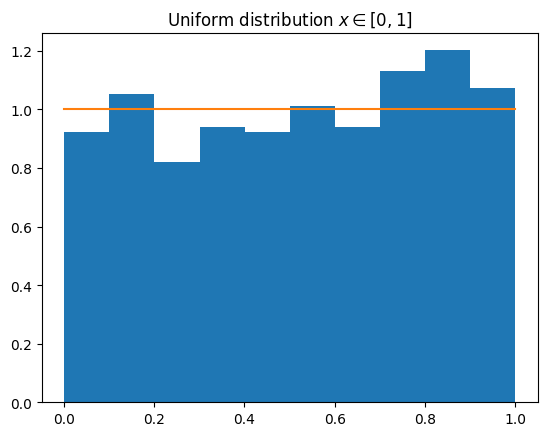

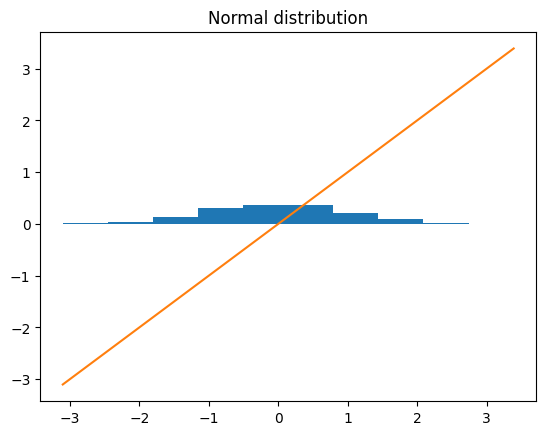

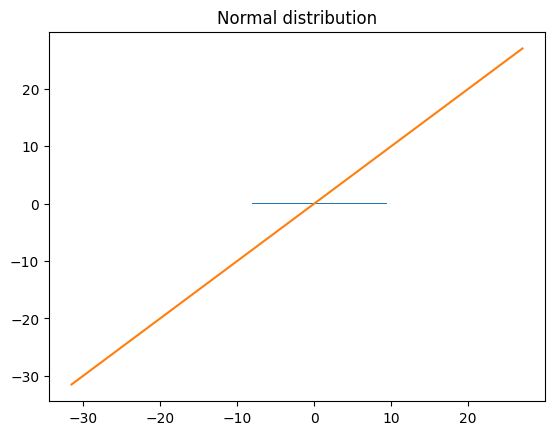

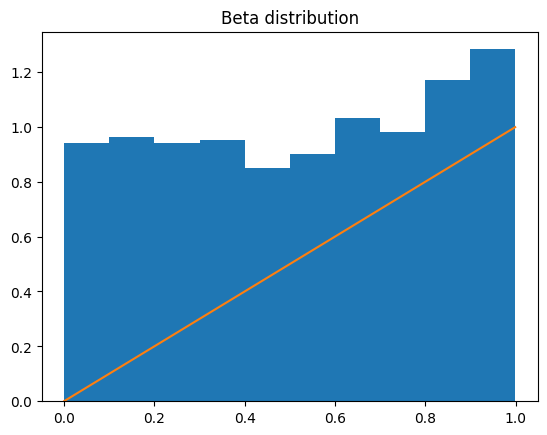

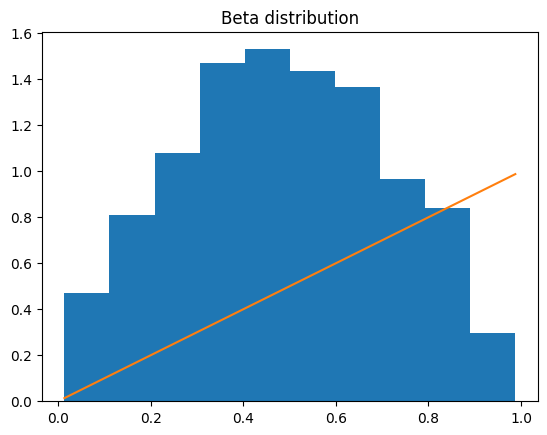

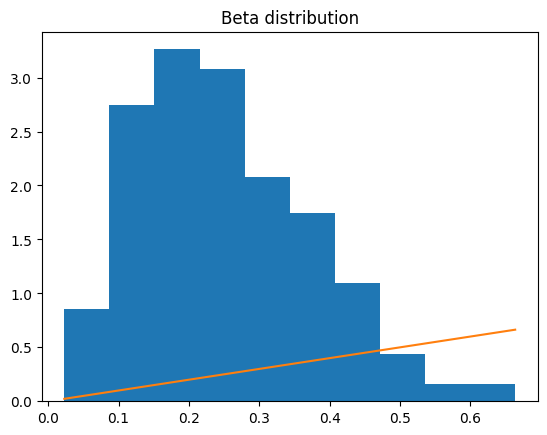

In [34]:
uniform_distribution_0_1_anal = lambda x: 1 / (1 - 0) + x*0
plotter_hist1D(uniform_distribution_0_1, uniform_distribution_0_1_anal, bins=10, title="Uniform distribution $x\in [0,1]$")

normal_distribution_mu0_sig1_anal = lambda x: x
plotter_hist1D(normal_distribution_mu0_sig1, normal_distribution_mu0_sig1_anal, bins=10, title='Normal distribution')

normal_distribution_mu0_sig10_anal = lambda x: x
plotter_hist1D(normal_distribution_mu0_sig10, normal_distribution_mu0_sig10_anal, bins=10, title='Normal distribution')

beta_distribution_a1_b1_anal = lambda x: x
plotter_hist1D(beta_distribution_a1_b1, beta_distribution_a1_b1_anal, bins=10, title='Beta distribution')

beta_distribution_a2_b2_anal = lambda x: x
plotter_hist1D(beta_distribution_a2_b2, beta_distribution_a2_b2_anal, bins=10, title='Beta distribution')

beta_distribution_a3_b9_anal = lambda x: x
plotter_hist1D(beta_distribution_a3_b9, beta_distribution_a3_b9_anal, bins=10, title='Beta distribution')


4. For two-dimensional distributions use ```hist2d``` method from ```pyplot```. Try to analyze influence of bins. Try different 2d histogram functions (ex. from ```seaborn```).


In [5]:
def plotter_hist2D(data: np.ndarray, bins: int=10, title: str=""):
    plt.hist2d(x=data[:,0], y=data[:,1], bins=bins)
    plt.title(title)
    plt.show()

5. Generate 1000 $y$ points from the following model (
First sample $\alpha,\ \beta,\ x, \ \sigma$, then compute $\mu$ algebraically, then sample a value of $y$. Do this 1000 times. To get HalfNormal sample from Normal and take the absolute value of result)
$$
    \begin{aligned}
    y\sim{}& \mathrm{Normal}(\mu, \sigma)\\
    \mu={}& \alpha + \beta x\\
    \alpha\sim{}&\mathrm{Normal}(2,0.1)\\
    \beta\sim{}&\mathrm{Normal}(0.2,0.2)\\
    x\sim{}&\mathrm{Normal}(0,3)\\
    \sigma\sim{}&\mathrm{HalfNormal}(0,1)
    \end{aligned} 
$$ 


6. Plot $y$ values as a function of $x$. Compare them with lines of $y=\alpha+\beta x$, plotted for $x$ between -6 and 6 for each of randomly sampled $\alpha$ and $\beta$ pair (on the same plot).  

